In [1]:
from __future__ import division
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
import scipy.optimize as op 

from sklearn.model_selection import train_test_split,StratifiedShuffleSplit 
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics as metrices

%matplotlib inline

pd.options.display.float_format = '{:.2f}'.format

In [3]:
geisinger_afib_panda = pd.read_csv('geisinger_afib_patients.csv',low_memory=False)
geisinger_non_afib_panda = pd.read_csv('geisinger_non_afib_patients.csv',low_memory=False)

In [4]:
#data for 2744 patients's first occurance of afib
data_afib_per_patient_panda = pd.read_csv('df_afib_no_duplicate_per_patient.csv')

#data for 1091 patients's whose first occurance of afib is before the stroke date
data_afib_diagnosed_before_storke = data_afib_per_patient_panda[data_afib_per_patient_panda['Occurance_in_years'] < 0]
data_afib_diagnosed_before_storke_at_index = data_afib_per_patient_panda[data_afib_per_patient_panda['Occurance_in_years'] == 0]
data_afib_diagnosed_after_storke_within_3_years =  data_afib_per_patient_panda[(data_afib_per_patient_panda['Occurance_in_years'] > 0) & (data_afib_per_patient_panda['Occurance_in_years'] <= 3)]
data_afib_diagnosed_other = data_afib_per_patient_panda[data_afib_per_patient_panda['Occurance_in_years'] > 3]

print(data_afib_diagnosed_before_storke['PT_ID'].nunique())
print(data_afib_diagnosed_before_storke_at_index['PT_ID'].nunique())
print(data_afib_diagnosed_after_storke_within_3_years['PT_ID'].nunique())
print(data_afib_diagnosed_other['PT_ID'].nunique())

1062
819
583
280


In [5]:
Lab_data_event_dates = pd.read_excel('LABS_DATASETS_CLEAN.xlsx',sheet_name='PT_ID and Event Dates')
Lab_data_BMI = pd.read_excel('LABS_DATASETS_CLEAN.xlsx',sheet_name='BMI')
Lab_data_CRP = pd.read_excel('LABS_DATASETS_CLEAN.xlsx',sheet_name='CRP')
Lab_data_ESR = pd.read_excel('LABS_DATASETS_CLEAN.xlsx',sheet_name='ESR')
Lab_data_GFR = pd.read_excel('LABS_DATASETS_CLEAN.xlsx',sheet_name='GFR')
Lab_data_HB = pd.read_excel('LABS_DATASETS_CLEAN.xlsx',sheet_name='HB')
Lab_data_HBA1C = pd.read_excel('LABS_DATASETS_CLEAN.xlsx',sheet_name='HBA1C')
Lab_data_HCT = pd.read_excel('LABS_DATASETS_CLEAN.xlsx',sheet_name='HCT')
Lab_data_HDL = pd.read_excel('LABS_DATASETS_CLEAN.xlsx',sheet_name='HDL')
Lab_data_LDL = pd.read_excel('LABS_DATASETS_CLEAN.xlsx',sheet_name='LDL')
Lab_data_PLT = pd.read_excel('LABS_DATASETS_CLEAN.xlsx',sheet_name='PLT')
Lab_data_WBC = pd.read_excel('LABS_DATASETS_CLEAN.xlsx',sheet_name='WBC')

In [6]:
Lab_data_event_dates = pd.read_excel('LABS_DATASETS_CLEAN.xlsx',sheet_name='PT_ID and Event Dates')
Lab_data_event_dates = Lab_data_event_dates[Lab_data_event_dates['PT_DEATH_DT'].notna()]
Lab_data_BMI = Lab_data_BMI[Lab_data_BMI['TIME_DIFF_BMI_INDEX'].notna()]
Lab_data_CRP = Lab_data_CRP[Lab_data_CRP['TIME_DIFF_CRP_INDEX'].notna()]
Lab_data_ESR = Lab_data_ESR[Lab_data_ESR['TIME_DIFF_ESR_INDEX'].notna()]
Lab_data_GFR = Lab_data_GFR[Lab_data_GFR['TIME_DIFF_GFR_INDEX'].notna()]
Lab_data_HB = Lab_data_HB[Lab_data_HB['TIME_DIFF_HB_INDEX'].notna()]
Lab_data_HBA1C = Lab_data_HBA1C[Lab_data_HBA1C['TIME_DIFF_HBA1C_INDEX'].notna()]
Lab_data_HCT = Lab_data_HCT[Lab_data_HCT['TIME_DIFF_HCT_INDEX'].notna()]
Lab_data_HDL = Lab_data_HDL[Lab_data_HDL['TIME_DIFF_HDL_INDEX'].notna()]
Lab_data_LDL = Lab_data_LDL[Lab_data_LDL['TIME_DIFF_LDL_INDEX'].notna()]
Lab_data_PLT = Lab_data_PLT[Lab_data_PLT['TIME_DIFF_PLT_INDEX'].notna()]
Lab_data_WBC = Lab_data_WBC[Lab_data_WBC['TIME_DIFF_WBC_INDEX'].notna()]

In [7]:
print(Lab_data_event_dates['PT_ID'].nunique())
print(Lab_data_BMI['PT_ID'].nunique())
print(Lab_data_CRP['PT_ID'].nunique())
print(Lab_data_ESR['PT_ID'].nunique())
print(Lab_data_GFR['PT_ID'].nunique())
print(Lab_data_HB['PT_ID'].nunique())
print(Lab_data_HBA1C['PT_ID'].nunique())
print(Lab_data_HCT['PT_ID'].nunique())
print(Lab_data_HDL['PT_ID'].nunique())
print(Lab_data_LDL['PT_ID'].nunique())
print(Lab_data_PLT['PT_ID'].nunique())
print(Lab_data_WBC['PT_ID'].nunique())

2765
8649
2514
4540
8821
8868
7774
8867
8528
8522
8863
8863


In [8]:
Lab_data_BMI_refined = Lab_data_BMI[(Lab_data_BMI['TIME_DIFF_BMI_INDEX'] <= 0) & (Lab_data_BMI['TIME_DIFF_BMI_INDEX'] > -1095)]
Lab_data_CRP_refined = Lab_data_CRP[(Lab_data_CRP['TIME_DIFF_CRP_INDEX'] <= 0) & (Lab_data_CRP['TIME_DIFF_CRP_INDEX'] > -1095)]
Lab_data_ESR_refined = Lab_data_ESR[(Lab_data_ESR['TIME_DIFF_ESR_INDEX'] <= 0) & (Lab_data_ESR['TIME_DIFF_ESR_INDEX'] > -1095)]
Lab_data_GFR_refined = Lab_data_GFR[(Lab_data_GFR['TIME_DIFF_GFR_INDEX'] <= 0) & (Lab_data_GFR['TIME_DIFF_GFR_INDEX']  > -1095)]
Lab_data_HB_refined = Lab_data_HB[(Lab_data_HB['TIME_DIFF_HB_INDEX'] <= 0) & (Lab_data_HB['TIME_DIFF_HB_INDEX'] < 1095)]
Lab_data_HBA1C_refined = Lab_data_HBA1C[(Lab_data_HBA1C['TIME_DIFF_HBA1C_INDEX'] >= 0) & (Lab_data_HBA1C['TIME_DIFF_HBA1C_INDEX'] < 1095)]
Lab_data_HCT_refined = Lab_data_HCT[(Lab_data_HCT['TIME_DIFF_HCT_INDEX'] <= 0) & (Lab_data_HCT['TIME_DIFF_HCT_INDEX'] > -1095)]
Lab_data_HDL_refined = Lab_data_HDL[(Lab_data_HDL['TIME_DIFF_HDL_INDEX'] <= 0) & (Lab_data_HDL['TIME_DIFF_HDL_INDEX'] > -1095)]
Lab_data_LDL_refined = Lab_data_LDL[(Lab_data_LDL['TIME_DIFF_LDL_INDEX'] <= 0) & (Lab_data_LDL['TIME_DIFF_LDL_INDEX'] > -1095)]
Lab_data_PLT_refined = Lab_data_PLT[(Lab_data_PLT['TIME_DIFF_PLT_INDEX'] <= 0) & (Lab_data_PLT['TIME_DIFF_PLT_INDEX'] > -1095)]
Lab_data_WBC_refined = Lab_data_WBC[(Lab_data_WBC['TIME_DIFF_WBC_INDEX'] <= 0) & (Lab_data_WBC['TIME_DIFF_WBC_INDEX'] > -1095)]

In [9]:
print(Lab_data_BMI_refined['PT_ID'].nunique())
print(Lab_data_CRP_refined['PT_ID'].nunique())
print(Lab_data_ESR_refined['PT_ID'].nunique())
print(Lab_data_GFR_refined['PT_ID'].nunique())
print(Lab_data_HB_refined['PT_ID'].nunique())
print(Lab_data_HBA1C_refined['PT_ID'].nunique())
print(Lab_data_HCT_refined['PT_ID'].nunique())
print(Lab_data_HDL_refined['PT_ID'].nunique())
print(Lab_data_LDL_refined['PT_ID'].nunique())
print(Lab_data_PLT_refined['PT_ID'].nunique())
print(Lab_data_WBC_refined['PT_ID'].nunique())

8003
870
1915
8181
8485
7127
8330
5020
5100
8325
8317


# $\color{BLUE}{\text{Patients having afib before stroke index}}$

In [10]:
Lab_data_BMI_before_stroke = Lab_data_BMI_refined[Lab_data_BMI_refined['PT_ID'].isin(data_afib_diagnosed_before_storke['PT_ID'])]
print('BMI ',Lab_data_BMI_before_stroke['PT_ID'].nunique())
Lab_data_CRP_before_stroke = Lab_data_CRP_refined[Lab_data_CRP_refined['PT_ID'].isin(data_afib_diagnosed_before_storke['PT_ID'])]
print('CRP ',Lab_data_CRP_before_stroke['PT_ID'].nunique())
Lab_data_ESR_before_stroke = Lab_data_ESR_refined[Lab_data_ESR_refined['PT_ID'].isin(data_afib_diagnosed_before_storke['PT_ID'])]
print('ESR ',Lab_data_ESR_before_stroke['PT_ID'].nunique())
Lab_data_GFR_before_stroke = Lab_data_GFR_refined[Lab_data_GFR_refined['PT_ID'].isin(data_afib_diagnosed_before_storke['PT_ID'])]
print('GFR ',Lab_data_GFR_before_stroke['PT_ID'].nunique())
Lab_data_HB_before_stroke = Lab_data_HB_refined[Lab_data_HB_refined['PT_ID'].isin(data_afib_diagnosed_before_storke['PT_ID'])]
print('HB ',Lab_data_HB_before_stroke['PT_ID'].nunique())
Lab_data_HBA1C_before_stroke = Lab_data_HBA1C_refined[Lab_data_HBA1C_refined['PT_ID'].isin(data_afib_diagnosed_before_storke['PT_ID'])]
print('HBA1C ',Lab_data_HBA1C_before_stroke['PT_ID'].nunique())
Lab_data_HCT_before_stroke = Lab_data_HCT_refined[Lab_data_HCT_refined['PT_ID'].isin(data_afib_diagnosed_before_storke['PT_ID'])]
print('HCT ',Lab_data_HCT_before_stroke['PT_ID'].nunique())
Lab_data_HDL_before_stroke = Lab_data_HDL_refined[Lab_data_HDL_refined['PT_ID'].isin(data_afib_diagnosed_before_storke['PT_ID'])]
print('HDL ',Lab_data_HDL_before_stroke['PT_ID'].nunique())
Lab_data_LDL_before_stroke = Lab_data_LDL_refined[Lab_data_LDL_refined['PT_ID'].isin(data_afib_diagnosed_before_storke['PT_ID'])]
print('LDL ',Lab_data_LDL_before_stroke['PT_ID'].nunique())
Lab_data_PLT_before_stroke = Lab_data_PLT_refined[Lab_data_PLT_refined['PT_ID'].isin(data_afib_diagnosed_before_storke['PT_ID'])]
print('PLT ',Lab_data_PLT_before_stroke['PT_ID'].nunique())
Lab_data_WBC_before_stroke = Lab_data_WBC_refined[Lab_data_WBC_refined['PT_ID'].isin(data_afib_diagnosed_before_storke['PT_ID'])]
print('WBC ',Lab_data_WBC_before_stroke['PT_ID'].nunique())

BMI  1042
CRP  153
ESR  326
GFR  1034
HB  1056
HBA1C  851
HCT  1043
HDL  772
LDL  791
PLT  1042
WBC  1043


In [11]:
data_afib_diagnosed_before_storke[~data_afib_diagnosed_before_storke['PT_ID'].isin(Lab_data_BMI_before_stroke['PT_ID'])].count()

ENC_DT                 20
ENC_TYPE               20
ICD_CD                 20
ICD_NM                 20
INDEX_DT               20
PT_ID                  20
Difference             20
Difference_in_years    20
Occurance_in_years     20
dtype: int64

In [12]:
print('========================')
print('BMI \n',Lab_data_BMI_before_stroke.describe())
print('========================')
print('CRP \n',Lab_data_CRP_before_stroke['PT_ID'].describe())
print('========================')
print('ESR \n',Lab_data_ESR_before_stroke['PT_ID'].describe())
print('========================')
print('GFR \n',Lab_data_GFR_before_stroke['PT_ID'].describe())
print('========================')
print('HB \n',Lab_data_HB_before_stroke['PT_ID'].describe())
print('========================')
print('HBA1C \n',Lab_data_HBA1C_before_stroke['PT_ID'].describe())
print('========================')
print('HCT \n',Lab_data_HCT_before_stroke['PT_ID'].describe())
print('========================')
print('HDL \n',Lab_data_HDL_before_stroke['PT_ID'].describe())
print('========================')
print('LDL \n',Lab_data_LDL_before_stroke['PT_ID'].describe())
print('========================')
print('PLT \n',Lab_data_PLT_before_stroke['PT_ID'].describe())
print('========================')
print('WBC \n',Lab_data_WBC_before_stroke['PT_ID'].describe())


BMI 
        BMI_VALUE  TIME_DIFF_BMI_INDEX
count   21886.00             21886.00
mean       29.77              -461.19
std         6.73               330.99
min        15.00             -1094.00
25%        25.00              -734.00
50%        29.10              -438.00
75%        33.40              -158.00
max        92.00                 0.00
CRP 
 count          297
unique         153
top       PT777077
freq            21
Name: PT_ID, dtype: object
ESR 
 count           648
unique          326
top       PT1060126
freq             22
Name: PT_ID, dtype: object
GFR 
 count        18561
unique        1034
top       PT234434
freq           253
Name: PT_ID, dtype: object
HB 
 count        36185
unique        1056
top       PT263782
freq           642
Name: PT_ID, dtype: object
HBA1C 
 count         2082
unique         851
top       PT336644
freq            18
Name: PT_ID, dtype: object
HCT 
 count        16125
unique        1043
top       PT741218
freq           197
Name: PT_ID, dtype: 

In [13]:
Lab_data_BMI_before_stroke_sorted = Lab_data_BMI_before_stroke.sort_values(by=['TIME_DIFF_BMI_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('===================================================')
print('BMI \n',Lab_data_BMI_before_stroke_sorted.describe())
#Lab_data_BMI_before_stroke_sorted['BMI_VALUE'].hist(bins=100)
print('===================================================')
Lab_data_CRP_before_stroke_sorted = Lab_data_CRP_before_stroke.sort_values(by=['TIME_DIFF_CRP_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('CRP \n',Lab_data_CRP_before_stroke_sorted.describe())
#Lab_data_CRP_before_stroke_sorted['CRP_VALUE'].hist(bins=100)
print('===================================================')
Lab_data_ESR_before_stroke_sorted = Lab_data_ESR_before_stroke.sort_values(by=['TIME_DIFF_ESR_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('ESR \n',Lab_data_ESR_before_stroke_sorted.describe())
#Lab_data_ESR_before_stroke_sorted['ESR_VALUE'].hist(bins=100)
print('===================================================')
Lab_data_GFR_before_stroke_sorted = Lab_data_GFR_before_stroke.sort_values(by=['TIME_DIFF_GFR_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('GFR \n',Lab_data_GFR_before_stroke_sorted.describe())
#Lab_data_GFR_before_stroke_sorted['GFR_VALUE'].hist(bins=100)
print('===================================================')
Lab_data_HB_before_stroke_sorted = Lab_data_HB_before_stroke.sort_values(by=['TIME_DIFF_HB_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HB \n',Lab_data_HB_before_stroke_sorted.describe())
#Lab_data_HB_before_stroke_sorted['HB_VALUE'].hist(bins=100)
print('===================================================')
Lab_data_HBA1C_before_stroke_sorted = Lab_data_HBA1C_before_stroke.sort_values(by=['TIME_DIFF_HBA1C_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HBA1C \n',Lab_data_HBA1C_before_stroke_sorted.describe())
#Lab_data_HBA1C_before_stroke_sorted['HBA1C_VALUE'].hist(bins=100)
print('===================================================')
Lab_data_HCT_before_stroke_sorted = Lab_data_HCT_before_stroke.sort_values(by=['TIME_DIFF_HCT_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HCT \n',Lab_data_HCT_before_stroke_sorted.describe())
#Lab_data_HCT_before_stroke_sorted['HCT_VALUE'].hist(bins=100)
print('===================================================')
Lab_data_HDL_before_stroke_sorted = Lab_data_HDL_before_stroke.sort_values(by=['TIME_DIFF_HDL_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HDL \n',Lab_data_HDL_before_stroke_sorted.describe())
#Lab_data_HDL_before_stroke_sorted['HDL_VALUE'].hist(bins=100)
print('===================================================')
Lab_data_LDL_before_stroke_sorted =Lab_data_LDL_before_stroke.sort_values(by=['TIME_DIFF_LDL_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('LDL \n',Lab_data_LDL_before_stroke_sorted.describe())
#Lab_data_LDL_before_stroke_sorted['LDL_VALUE'].hist(bins=100)
print('===================================================')
Lab_data_PLT_before_stroke_sorted = Lab_data_PLT_before_stroke.sort_values(by=['TIME_DIFF_PLT_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('PLT \n',Lab_data_PLT_before_stroke_sorted.describe())
#Lab_data_PLT_before_stroke_sorted['PLT_VALUE'].hist(bins=100)
print('===================================================')
Lab_data_WBC_before_stroke_sorted = Lab_data_WBC_before_stroke.sort_values(by=['TIME_DIFF_WBC_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('WBC \n',Lab_data_WBC_before_stroke_sorted.describe())
#Lab_data_WBC_before_stroke_sorted['WBC_VALUE'].hist(bins=100)

BMI 
        BMI_VALUE  TIME_DIFF_BMI_INDEX
count    1042.00              1042.00
mean       28.62               -22.62
std         6.23               101.03
min        15.10             -1087.00
25%        24.40                 0.00
50%        27.80                 0.00
75%        32.58                 0.00
max        58.90                 0.00
CRP 
        CRP_VALUE  TIME_DIFF_CRP_INDEX
count     153.00               153.00
mean       41.87              -373.66
std        62.40               329.27
min         0.84             -1094.00
25%         4.00              -571.00
50%        13.53              -307.00
75%        52.00               -84.00
max       318.00                 0.00
ESR 
        ESR_VALUE  TIME_DIFF_ESR_INDEX
count     326.00               326.00
mean       35.21              -320.26
std        28.49               328.63
min         1.00             -1094.00
25%        13.00              -537.75
50%        26.00              -205.00
75%        50.00               -

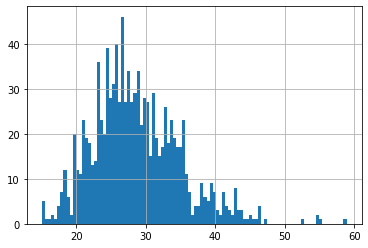

In [14]:
Lab_data_BMI_before_stroke_sorted['BMI_VALUE'].hist(bins=100)

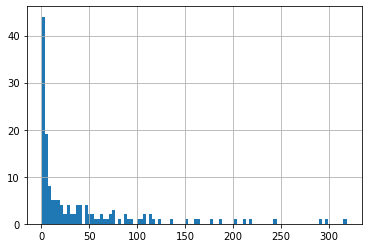

In [15]:
Lab_data_CRP_before_stroke_sorted['CRP_VALUE'].hist(bins=100)

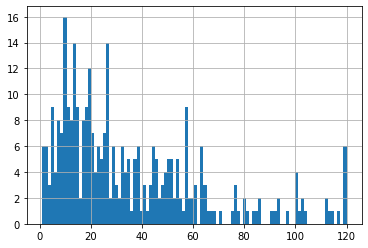

In [16]:
Lab_data_ESR_before_stroke_sorted['ESR_VALUE'].hist(bins=100)

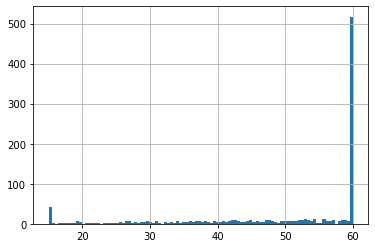

In [17]:
Lab_data_GFR_before_stroke_sorted['GFR_VALUE'].hist(bins=100)

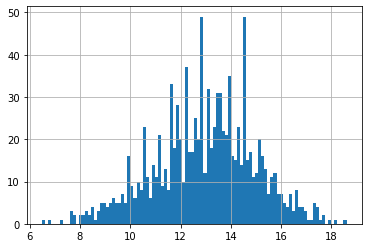

In [18]:
Lab_data_HB_before_stroke_sorted['HB_VALUE'].hist(bins=100)

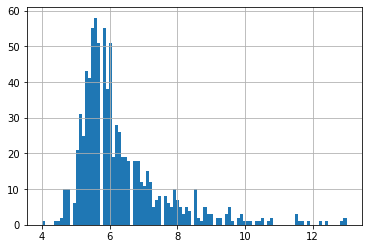

In [19]:
Lab_data_HBA1C_before_stroke_sorted['HBA1C_VALUE'].hist(bins=100)

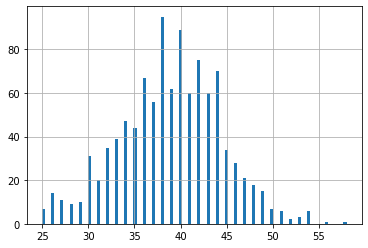

In [20]:
Lab_data_HCT_before_stroke_sorted['HCT_VALUE'].hist(bins=100)

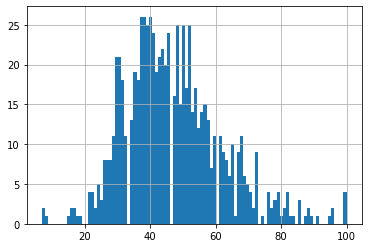

In [21]:
Lab_data_HDL_before_stroke_sorted['HDL_VALUE'].hist(bins=100)

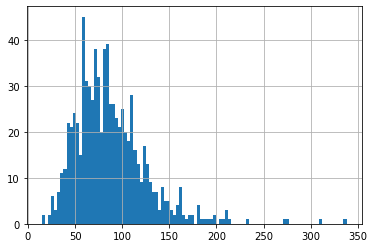

In [22]:
Lab_data_LDL_before_stroke_sorted['LDL_VALUE'].hist(bins=100)

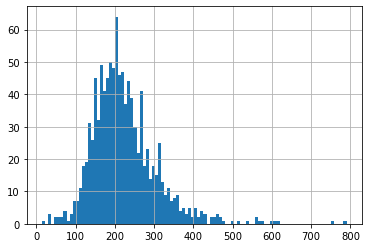

In [23]:
Lab_data_PLT_before_stroke_sorted['PLT_VALUE'].hist(bins=100)

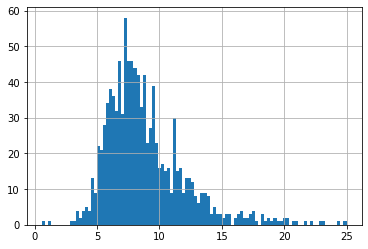

In [24]:
Lab_data_WBC_before_stroke_sorted['WBC_VALUE'].hist(bins=100)

# $\color{BLUE}{\text{Patients having afib at stroke index}}$

In [25]:
Lab_data_BMI_before_stroke_at_index = Lab_data_BMI_refined[Lab_data_BMI_refined['PT_ID'].isin(data_afib_diagnosed_before_storke_at_index['PT_ID'])]
print('BMI ',Lab_data_BMI_before_stroke_at_index['PT_ID'].nunique())
Lab_data_CRP_before_stroke_at_index = Lab_data_CRP_refined[Lab_data_CRP_refined['PT_ID'].isin(data_afib_diagnosed_before_storke_at_index['PT_ID'])]
print('CRP ',Lab_data_CRP_before_stroke_at_index['PT_ID'].nunique())
Lab_data_ESR_before_stroke_at_index = Lab_data_ESR_refined[Lab_data_ESR_refined['PT_ID'].isin(data_afib_diagnosed_before_storke_at_index['PT_ID'])]
print('ESR ',Lab_data_ESR_before_stroke_at_index['PT_ID'].nunique())
Lab_data_GFR_before_stroke_at_index = Lab_data_GFR_refined[Lab_data_GFR_refined['PT_ID'].isin(data_afib_diagnosed_before_storke_at_index['PT_ID'])]
print('GFR ',Lab_data_GFR_before_stroke_at_index['PT_ID'].nunique())
Lab_data_HB_before_stroke_at_index = Lab_data_HB_refined[Lab_data_HB_refined['PT_ID'].isin(data_afib_diagnosed_before_storke_at_index['PT_ID'])]
print('HB ',Lab_data_HB_before_stroke_at_index['PT_ID'].nunique())
Lab_data_HBA1C_before_stroke_at_index = Lab_data_HBA1C_refined[Lab_data_HBA1C_refined['PT_ID'].isin(data_afib_diagnosed_before_storke_at_index['PT_ID'])]
print('HBA1C ',Lab_data_HBA1C_before_stroke_at_index['PT_ID'].nunique())
Lab_data_HCT_before_stroke_at_index = Lab_data_HCT_refined[Lab_data_HCT_refined['PT_ID'].isin(data_afib_diagnosed_before_storke_at_index['PT_ID'])]
print('HCT ',Lab_data_HCT_before_stroke_at_index['PT_ID'].nunique())
Lab_data_HDL_before_stroke_at_index = Lab_data_HDL_refined[Lab_data_HDL_refined['PT_ID'].isin(data_afib_diagnosed_before_storke_at_index['PT_ID'])]
print('HDL ',Lab_data_HDL_before_stroke_at_index['PT_ID'].nunique())
Lab_data_LDL_before_stroke_at_index = Lab_data_LDL_refined[Lab_data_LDL_refined['PT_ID'].isin(data_afib_diagnosed_before_storke_at_index['PT_ID'])]
print('LDL ',Lab_data_LDL_before_stroke_at_index['PT_ID'].nunique())
Lab_data_PLT_before_stroke_at_index = Lab_data_PLT_refined[Lab_data_PLT_refined['PT_ID'].isin(data_afib_diagnosed_before_storke_at_index['PT_ID'])]
print('PLT ',Lab_data_PLT_before_stroke_at_index['PT_ID'].nunique())
Lab_data_WBC_before_stroke_at_index = Lab_data_WBC_refined[Lab_data_WBC_refined['PT_ID'].isin(data_afib_diagnosed_before_storke_at_index['PT_ID'])]
print('WBC ',Lab_data_WBC_before_stroke_at_index['PT_ID'].nunique())

BMI  740
CRP  41
ESR  94
GFR  738
HB  784
HBA1C  690
HCT  767
HDL  402
LDL  405
PLT  764
WBC  760


In [26]:
Lab_data_BMI_before_stroke_at_index_sorted = Lab_data_BMI_before_stroke_at_index.sort_values(by=['TIME_DIFF_BMI_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('BMI \n',Lab_data_BMI_before_stroke_at_index_sorted.describe())
Lab_data_CRP_before_stroke_at_index_sorted = Lab_data_CRP_before_stroke_at_index.sort_values(by=['TIME_DIFF_CRP_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('CRP \n',Lab_data_CRP_before_stroke_at_index_sorted.describe())
Lab_data_ESR_before_stroke_at_index_sorted = Lab_data_ESR_before_stroke_at_index.sort_values(by=['TIME_DIFF_ESR_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('ESR \n',Lab_data_ESR_before_stroke_at_index_sorted.describe())
Lab_data_GFR_before_stroke_at_index_sorted = Lab_data_GFR_before_stroke_at_index.sort_values(by=['TIME_DIFF_GFR_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('GFR \n',Lab_data_GFR_before_stroke_at_index_sorted.describe())
Lab_data_HB_before_stroke_at_index_sorted = Lab_data_HB_before_stroke_at_index.sort_values(by=['TIME_DIFF_HB_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HB \n',Lab_data_HB_before_stroke_at_index_sorted.describe())
Lab_data_HBA1C_before_stroke_at_index_sorted = Lab_data_HBA1C_before_stroke_at_index.sort_values(by=['TIME_DIFF_HBA1C_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HBA1C \n',Lab_data_HBA1C_before_stroke_at_index_sorted.describe())
Lab_data_HCT_before_stroke_at_index_sorted = Lab_data_HCT_before_stroke_at_index.sort_values(by=['TIME_DIFF_HCT_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HCT \n',Lab_data_HCT_before_stroke_at_index_sorted.describe())
Lab_data_HDL_before_stroke_at_index_sorted = Lab_data_HDL_before_stroke_at_index.sort_values(by=['TIME_DIFF_HDL_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HDL \n',Lab_data_HDL_before_stroke_at_index_sorted.describe())
Lab_data_LDL_before_stroke_at_index_sorted =Lab_data_LDL_before_stroke_at_index.sort_values(by=['TIME_DIFF_LDL_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('LDL \n',Lab_data_LDL_before_stroke_at_index_sorted.describe())
Lab_data_PLT_before_stroke_at_index_sorted = Lab_data_PLT_before_stroke_at_index.sort_values(by=['TIME_DIFF_PLT_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('PLT \n',Lab_data_PLT_before_stroke_at_index_sorted.describe())
Lab_data_WBC_before_stroke_at_index_sorted = Lab_data_WBC_before_stroke_at_index.sort_values(by=['TIME_DIFF_WBC_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('WBC \n',Lab_data_WBC_before_stroke_at_index_sorted.describe())

BMI 
        BMI_VALUE  TIME_DIFF_BMI_INDEX
count     740.00               740.00
mean       29.22               -18.57
std         6.88                94.65
min        15.50             -1073.00
25%        24.50                 0.00
50%        28.00                 0.00
75%        32.50                 0.00
max        60.80                 0.00
CRP 
        CRP_VALUE  TIME_DIFF_CRP_INDEX
count      41.00                41.00
mean       38.35              -297.56
std        55.94               349.51
min         1.00             -1084.00
25%         4.00              -501.00
50%        10.00              -115.00
75%        62.00                 0.00
max       298.00                 0.00
ESR 
        ESR_VALUE  TIME_DIFF_ESR_INDEX
count      94.00                94.00
mean       30.31              -257.02
std        24.50               344.14
min         2.00             -1090.00
25%        10.25              -468.25
50%        23.00               -64.50
75%        42.75                

# $\color{BLUE}{\text{Patients having afib within 3 years after stroke index}}$

In [27]:
Lab_data_BMI_after_storke_within_3_years = Lab_data_BMI_refined[Lab_data_BMI_refined['PT_ID'].isin(data_afib_diagnosed_after_storke_within_3_years['PT_ID'])]
print('BMI ',Lab_data_BMI_after_storke_within_3_years['PT_ID'].nunique())
Lab_data_CRP_after_storke_within_3_years = Lab_data_CRP_refined[Lab_data_CRP_refined['PT_ID'].isin(data_afib_diagnosed_after_storke_within_3_years['PT_ID'])]
print('CRP ',Lab_data_CRP_after_storke_within_3_years['PT_ID'].nunique())
Lab_data_ESR_after_storke_within_3_years = Lab_data_ESR_refined[Lab_data_ESR_refined['PT_ID'].isin(data_afib_diagnosed_after_storke_within_3_years['PT_ID'])]
print('ESR ',Lab_data_ESR_after_storke_within_3_years['PT_ID'].nunique())
Lab_data_GFR_after_storke_within_3_years = Lab_data_GFR_refined[Lab_data_GFR_refined['PT_ID'].isin(data_afib_diagnosed_after_storke_within_3_years['PT_ID'])]
print('GFR ',Lab_data_GFR_after_storke_within_3_years['PT_ID'].nunique())
Lab_data_HB_after_storke_within_3_years = Lab_data_HB_refined[Lab_data_HB_refined['PT_ID'].isin(data_afib_diagnosed_after_storke_within_3_years['PT_ID'])]
print('HB ',Lab_data_HB_after_storke_within_3_years['PT_ID'].nunique())
Lab_data_HBA1C_after_storke_within_3_years = Lab_data_HBA1C_refined[Lab_data_HBA1C_refined['PT_ID'].isin(data_afib_diagnosed_after_storke_within_3_years['PT_ID'])]
print('HBA1C ',Lab_data_HBA1C_after_storke_within_3_years['PT_ID'].nunique())
Lab_data_HCT_after_storke_within_3_years = Lab_data_HCT_refined[Lab_data_HCT_refined['PT_ID'].isin(data_afib_diagnosed_after_storke_within_3_years['PT_ID'])]
print('HCT ',Lab_data_HCT_after_storke_within_3_years['PT_ID'].nunique())
Lab_data_HDL_after_storke_within_3_years = Lab_data_HDL_refined[Lab_data_HDL_refined['PT_ID'].isin(data_afib_diagnosed_after_storke_within_3_years['PT_ID'])]
print('HDL ',Lab_data_HDL_after_storke_within_3_years['PT_ID'].nunique())
Lab_data_LDL_after_storke_within_3_years = Lab_data_LDL_refined[Lab_data_LDL_refined['PT_ID'].isin(data_afib_diagnosed_after_storke_within_3_years['PT_ID'])]
print('LDL ',Lab_data_LDL_after_storke_within_3_years['PT_ID'].nunique())
Lab_data_PLT_after_storke_within_3_years = Lab_data_PLT_refined[Lab_data_PLT_refined['PT_ID'].isin(data_afib_diagnosed_after_storke_within_3_years['PT_ID'])]
print('PLT ',Lab_data_PLT_after_storke_within_3_years['PT_ID'].nunique())
Lab_data_WBC_after_storke_within_3_years = Lab_data_WBC_refined[Lab_data_WBC_refined['PT_ID'].isin(data_afib_diagnosed_after_storke_within_3_years['PT_ID'])]
print('WBC ',Lab_data_WBC_after_storke_within_3_years['PT_ID'].nunique())

BMI  517
CRP  47
ESR  103
GFR  531
HB  547
HBA1C  472
HCT  532
HDL  322
LDL  328
PLT  530
WBC  529


In [28]:
Lab_data_BMI_after_storke_within_3_years = Lab_data_BMI_after_storke_within_3_years.sort_values(by=['TIME_DIFF_BMI_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('BMI \n',Lab_data_BMI_after_storke_within_3_years.describe())
Lab_data_CRP_after_storke_within_3_years = Lab_data_CRP_after_storke_within_3_years.sort_values(by=['TIME_DIFF_CRP_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('CRP \n',Lab_data_CRP_after_storke_within_3_years.describe())
Lab_data_ESR_after_storke_within_3_years = Lab_data_ESR_after_storke_within_3_years.sort_values(by=['TIME_DIFF_ESR_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('ESR \n',Lab_data_ESR_after_storke_within_3_years.describe())
Lab_data_GFR_after_storke_within_3_years = Lab_data_GFR_after_storke_within_3_years.sort_values(by=['TIME_DIFF_GFR_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('GFR \n',Lab_data_GFR_after_storke_within_3_years.describe())
Lab_data_HB_after_storke_within_3_years = Lab_data_HB_after_storke_within_3_years.sort_values(by=['TIME_DIFF_HB_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HB \n',Lab_data_HB_after_storke_within_3_years.describe())
Lab_data_HBA1C_after_storke_within_3_years = Lab_data_HBA1C_after_storke_within_3_years.sort_values(by=['TIME_DIFF_HBA1C_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HBA1C \n',Lab_data_HBA1C_after_storke_within_3_years.describe())
Lab_data_HCT_after_storke_within_3_years= Lab_data_HCT_after_storke_within_3_years.sort_values(by=['TIME_DIFF_HCT_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HCT \n',Lab_data_HCT_after_storke_within_3_years.describe())
Lab_data_HDL_after_storke_within_3_years = Lab_data_HDL_after_storke_within_3_years.sort_values(by=['TIME_DIFF_HDL_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HDL \n',Lab_data_HDL_after_storke_within_3_years.describe())
Lab_data_LDL_after_storke_within_3_years =Lab_data_LDL_after_storke_within_3_years.sort_values(by=['TIME_DIFF_LDL_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('LDL \n',Lab_data_LDL_after_storke_within_3_years.describe())
Lab_data_PLT_after_storke_within_3_years = Lab_data_PLT_after_storke_within_3_years.sort_values(by=['TIME_DIFF_PLT_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('PLT \n',Lab_data_PLT_after_storke_within_3_years.describe())
Lab_data_WBC_after_storke_within_3_years = Lab_data_WBC_after_storke_within_3_years.sort_values(by=['TIME_DIFF_WBC_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('WBC \n',Lab_data_WBC_after_storke_within_3_years.describe())

BMI 
        BMI_VALUE  TIME_DIFF_BMI_INDEX
count     517.00               517.00
mean       29.71               -29.62
std         6.61               123.60
min        16.10             -1091.00
25%        25.20                 0.00
50%        28.70                 0.00
75%        33.40                 0.00
max        62.00                 0.00
CRP 
        CRP_VALUE  TIME_DIFF_CRP_INDEX
count      47.00                47.00
mean       36.37              -317.94
std        64.64               319.17
min         0.42              -969.00
25%         2.00              -526.50
50%         5.00              -222.00
75%        41.00               -14.50
max       286.00                 0.00
ESR 
        ESR_VALUE  TIME_DIFF_ESR_INDEX
count     103.00               103.00
mean       30.37              -266.23
std        25.81               326.25
min         0.00             -1044.00
25%        11.00              -438.00
50%        20.00              -103.00
75%        41.00                

# $\color{BLUE}{\text{Patients having afib 3 years after stroke index}}$

In [29]:
Lab_data_BMI_other = Lab_data_BMI_refined[Lab_data_BMI_refined['PT_ID'].isin(data_afib_diagnosed_other['PT_ID'])]
print('BMI ',Lab_data_BMI_other['PT_ID'].nunique())
Lab_data_CRP_other = Lab_data_CRP_refined[Lab_data_CRP_refined['PT_ID'].isin(data_afib_diagnosed_other['PT_ID'])]
print('CRP ',Lab_data_CRP_other['PT_ID'].nunique())
Lab_data_ESR_other = Lab_data_ESR_refined[Lab_data_ESR_refined['PT_ID'].isin(data_afib_diagnosed_other['PT_ID'])]
print('ESR ',Lab_data_ESR_other['PT_ID'].nunique())
Lab_data_GFR_other = Lab_data_GFR_refined[Lab_data_GFR_refined['PT_ID'].isin(data_afib_diagnosed_other['PT_ID'])]
print('GFR ',Lab_data_GFR_other['PT_ID'].nunique())
Lab_data_HB_other = Lab_data_HB_refined[Lab_data_HB_refined['PT_ID'].isin(data_afib_diagnosed_other['PT_ID'])]
print('HB ',Lab_data_HB_other['PT_ID'].nunique())
Lab_data_HBA1C_other = Lab_data_HBA1C_refined[Lab_data_HBA1C_refined['PT_ID'].isin(data_afib_diagnosed_other['PT_ID'])]
print('HBA1C ',Lab_data_HBA1C_other['PT_ID'].nunique())
Lab_data_HCT_other = Lab_data_HCT_refined[Lab_data_HCT_refined['PT_ID'].isin(data_afib_diagnosed_other['PT_ID'])]
print('HCT ',Lab_data_HCT_other['PT_ID'].nunique())
Lab_data_HDL_other = Lab_data_HDL_refined[Lab_data_HDL_refined['PT_ID'].isin(data_afib_diagnosed_other['PT_ID'])]
print('HDL ',Lab_data_HDL_other['PT_ID'].nunique())
Lab_data_LDL_other = Lab_data_LDL_refined[Lab_data_LDL_refined['PT_ID'].isin(data_afib_diagnosed_other['PT_ID'])]
print('LDL ',Lab_data_LDL_other['PT_ID'].nunique())
Lab_data_PLT_other = Lab_data_PLT_refined[Lab_data_PLT_refined['PT_ID'].isin(data_afib_diagnosed_other['PT_ID'])]
print('PLT ',Lab_data_PLT_other['PT_ID'].nunique())
Lab_data_WBC_other = Lab_data_WBC_refined[Lab_data_WBC_refined['PT_ID'].isin(data_afib_diagnosed_other['PT_ID'])]
print('WBC ',Lab_data_WBC_other['PT_ID'].nunique())

BMI  234
CRP  19
ESR  69
GFR  251
HB  262
HBA1C  185
HCT  251
HDL  158
LDL  157
PLT  251
WBC  251


In [30]:
Lab_data_BMI_other= Lab_data_BMI_other.sort_values(by=['TIME_DIFF_BMI_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('BMI \n',Lab_data_BMI_other.describe())
Lab_data_CRP_other = Lab_data_CRP_other.sort_values(by=['TIME_DIFF_CRP_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('CRP \n',Lab_data_CRP_other.describe())
Lab_data_ESR_other = Lab_data_ESR_other.sort_values(by=['TIME_DIFF_ESR_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('ESR \n',Lab_data_ESR_other.describe())
Lab_data_GFR_other = Lab_data_GFR_other.sort_values(by=['TIME_DIFF_GFR_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('GFR \n',Lab_data_GFR_other.describe())
Lab_data_HB_other = Lab_data_HB_other.sort_values(by=['TIME_DIFF_HB_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HB \n',Lab_data_HB_other.describe())
Lab_data_HBA1C_other = Lab_data_HBA1C_other.sort_values(by=['TIME_DIFF_HBA1C_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HBA1C \n',Lab_data_HBA1C_other.describe())
Lab_data_HCT_other = Lab_data_HCT_other.sort_values(by=['TIME_DIFF_HCT_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HCT \n',Lab_data_HCT_other.describe())
Lab_data_HDL_other = Lab_data_HDL_other.sort_values(by=['TIME_DIFF_HDL_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HDL \n',Lab_data_HDL_other.describe())
Lab_data_LDL_other =Lab_data_LDL_other.sort_values(by=['TIME_DIFF_LDL_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('LDL \n',Lab_data_LDL_other.describe())
Lab_data_PLT_other = Lab_data_PLT_other.sort_values(by=['TIME_DIFF_PLT_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('PLT \n',Lab_data_PLT_other.describe())
Lab_data_WBC_other= Lab_data_WBC_other.sort_values(by=['TIME_DIFF_WBC_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('WBC \n',Lab_data_WBC_other.describe())

BMI 
        BMI_VALUE  TIME_DIFF_BMI_INDEX
count     234.00               234.00
mean       30.66               -50.65
std         7.38               149.32
min        16.50             -1073.00
25%        25.80               -25.75
50%        29.55                 0.00
75%        33.70                 0.00
max        65.50                 0.00
CRP 
        CRP_VALUE  TIME_DIFF_CRP_INDEX
count      19.00                19.00
mean       47.50              -355.74
std        86.50               368.43
min         0.82             -1084.00
25%         1.81              -632.00
50%        13.00              -260.00
75%        30.90                -2.50
max       297.00                 0.00
ESR 
        ESR_VALUE  TIME_DIFF_ESR_INDEX
count      69.00                69.00
mean       27.14              -302.28
std        20.31               362.59
min         1.00             -1084.00
25%        10.00              -460.00
50%        25.00              -137.00
75%        38.00                

# $\color{RED}{\text{Patients having no Afib at all}}$

In [31]:
Lab_data_BMI_non_afib = Lab_data_BMI_refined[Lab_data_BMI_refined['PT_ID'].isin(geisinger_non_afib_panda['PT_ID'])]
print('BMI ',Lab_data_BMI_non_afib['PT_ID'].nunique())
Lab_data_CRP_non_afib = Lab_data_CRP_refined[Lab_data_CRP_refined['PT_ID'].isin(geisinger_non_afib_panda['PT_ID'])]
print('CRP ',Lab_data_CRP_non_afib['PT_ID'].nunique())
Lab_data_ESR_non_afib = Lab_data_ESR_refined[Lab_data_ESR_refined['PT_ID'].isin(geisinger_non_afib_panda['PT_ID'])]
print('ESR ',Lab_data_ESR_non_afib['PT_ID'].nunique())
Lab_data_GFR_non_afib= Lab_data_GFR_refined[Lab_data_GFR_refined['PT_ID'].isin(geisinger_non_afib_panda['PT_ID'])]
print('GFR ',Lab_data_GFR_non_afib['PT_ID'].nunique())
Lab_data_HB_non_afib = Lab_data_HB_refined[Lab_data_HB_refined['PT_ID'].isin(geisinger_non_afib_panda['PT_ID'])]
print('HB ',Lab_data_HB_non_afib['PT_ID'].nunique())
Lab_data_HBA1C_non_afib = Lab_data_HBA1C_refined[Lab_data_HBA1C_refined['PT_ID'].isin(geisinger_non_afib_panda['PT_ID'])]
print('HBA1C ',Lab_data_HBA1C_non_afib['PT_ID'].nunique())
Lab_data_HCT_non_afib = Lab_data_HCT_refined[Lab_data_HCT_refined['PT_ID'].isin(geisinger_non_afib_panda['PT_ID'])]
print('HCT ',Lab_data_HCT_non_afib['PT_ID'].nunique())
Lab_data_HDL_non_afib = Lab_data_HDL_refined[Lab_data_HDL_refined['PT_ID'].isin(geisinger_non_afib_panda['PT_ID'])]
print('HDL ',Lab_data_HDL_non_afib['PT_ID'].nunique())
Lab_data_LDL_non_afib = Lab_data_LDL_refined[Lab_data_LDL_refined['PT_ID'].isin(geisinger_non_afib_panda['PT_ID'])]
print('LDL ',Lab_data_LDL_non_afib['PT_ID'].nunique())
Lab_data_PLT_non_afib = Lab_data_PLT_refined[Lab_data_PLT_refined['PT_ID'].isin(geisinger_non_afib_panda['PT_ID'])]
print('PLT ',Lab_data_PLT_non_afib['PT_ID'].nunique())
Lab_data_WBC_non_afib = Lab_data_WBC_refined[Lab_data_WBC_refined['PT_ID'].isin(geisinger_non_afib_panda['PT_ID'])]
print('WBC ',Lab_data_WBC_non_afib['PT_ID'].nunique())

BMI  5469
CRP  610
ESR  1323
GFR  5626
HB  5835
HBA1C  4928
HCT  5736
HDL  3365
LDL  3418
PLT  5737
WBC  5733


In [32]:
Lab_data_BMI_non_afib= Lab_data_BMI_non_afib.sort_values(by=['TIME_DIFF_BMI_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('BMI \n',Lab_data_BMI_non_afib.describe())
Lab_data_CRP_non_afib = Lab_data_CRP_non_afib.sort_values(by=['TIME_DIFF_CRP_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('CRP \n',Lab_data_CRP_non_afib.describe())
Lab_data_ESR_non_afib = Lab_data_ESR_non_afib.sort_values(by=['TIME_DIFF_ESR_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('ESR \n',Lab_data_ESR_non_afib.describe())
Lab_data_GFR_non_afib = Lab_data_GFR_non_afib.sort_values(by=['TIME_DIFF_GFR_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('GFR \n',Lab_data_GFR_non_afib.describe())
Lab_data_HB_non_afib = Lab_data_HB_non_afib.sort_values(by=['TIME_DIFF_HB_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HB \n',Lab_data_HB_non_afib.describe())
Lab_data_HBA1C_non_afib = Lab_data_HBA1C_non_afib.sort_values(by=['TIME_DIFF_HBA1C_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HBA1C \n',Lab_data_HBA1C_non_afib.describe())
Lab_data_HCT_non_afib = Lab_data_HCT_non_afib.sort_values(by=['TIME_DIFF_HCT_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HCT \n',Lab_data_HCT_non_afib.describe())
Lab_data_HDL_non_afib = Lab_data_HDL_non_afib.sort_values(by=['TIME_DIFF_HDL_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HDL \n',Lab_data_HDL_non_afib.describe())
Lab_data_LDL_non_afib =Lab_data_LDL_non_afib.sort_values(by=['TIME_DIFF_LDL_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('LDL \n',Lab_data_LDL_non_afib.describe())
Lab_data_PLT_non_afib = Lab_data_PLT_non_afib.sort_values(by=['TIME_DIFF_PLT_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('PLT \n',Lab_data_PLT_non_afib.describe())
Lab_data_WBC_non_afib= Lab_data_WBC_non_afib.sort_values(by=['TIME_DIFF_WBC_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('WBC \n',Lab_data_WBC_non_afib.describe())

BMI 
        BMI_VALUE  TIME_DIFF_BMI_INDEX
count    5469.00              5469.00
mean       29.25               -24.15
std         6.71               108.58
min        15.00             -1084.00
25%        24.70                 0.00
50%        28.30                 0.00
75%        32.80                 0.00
max        85.40                 0.00
CRP 
        CRP_VALUE  TIME_DIFF_CRP_INDEX
count     610.00               610.00
mean       26.64              -260.36
std        54.13               325.73
min         0.00             -1091.00
25%         2.00              -490.25
50%         5.00               -94.50
75%        20.86                 0.00
max       413.00                 0.00
ESR 
        ESR_VALUE  TIME_DIFF_ESR_INDEX
count    1323.00              1323.00
mean       28.60              -237.21
std        26.15               318.42
min         0.00             -1088.00
25%        10.00              -440.00
50%        20.00               -43.00
75%        38.00                

In [33]:
Lab_data_BMI_refined.nunique()

PT_ID                  8003
BMI_DT                 6436
BMI_VALUE               505
TIME_DIFF_BMI_INDEX    1095
dtype: int64

# having at least one follow up within 3 years and no afib

In [34]:
data_full_non_afib_patients = pd.read_csv('data_full_non_afib_patients.csv')

In [35]:
print(data_full_non_afib_patients['PT_ID'].nunique())
data_full_non_afib_patients['INDEX_DT'] = pd.to_datetime(data_full_non_afib_patients['INDEX_DT'])
data_full_non_afib_patients['ENC_DT'] = pd.to_datetime(data_full_non_afib_patients['ENC_DT'])
data_full_non_afib_patients['Difference'] = (data_full_non_afib_patients['ENC_DT'] - data_full_non_afib_patients['INDEX_DT'])
data_full_non_afib_patients['Difference_in_years'] = (data_full_non_afib_patients['ENC_DT'] - data_full_non_afib_patients['INDEX_DT'])/np.timedelta64(1,'Y')
data_full_non_afib_encounter_after_stroke = data_full_non_afib_patients[data_full_non_afib_patients['Difference_in_years'] > 0]
print(data_full_non_afib_encounter_after_stroke['PT_ID'].nunique())

6185
5789


In [36]:
data_full_non_afib_patients_no_afib_3_years_follow_up = data_full_non_afib_encounter_after_stroke[data_full_non_afib_encounter_after_stroke['Difference_in_years'] > 3]
print(data_full_non_afib_patients_no_afib_3_years_follow_up['PT_ID'].nunique())

2190


In [37]:
Lab_data_BMI_non_afib = Lab_data_BMI_refined[Lab_data_BMI_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_3_years_follow_up['PT_ID'])]
print('BMI ',Lab_data_BMI_non_afib['PT_ID'].nunique())
Lab_data_CRP_non_afib = Lab_data_CRP_refined[Lab_data_CRP_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_3_years_follow_up['PT_ID'])]
print('CRP ',Lab_data_CRP_non_afib['PT_ID'].nunique())
Lab_data_ESR_non_afib = Lab_data_ESR_refined[Lab_data_ESR_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_3_years_follow_up['PT_ID'])]
print('ESR ',Lab_data_ESR_non_afib['PT_ID'].nunique())
Lab_data_GFR_non_afib= Lab_data_GFR_refined[Lab_data_GFR_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_3_years_follow_up['PT_ID'])]
print('GFR ',Lab_data_GFR_non_afib['PT_ID'].nunique())
Lab_data_HB_non_afib = Lab_data_HB_refined[Lab_data_HB_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_3_years_follow_up['PT_ID'])]
print('HB ',Lab_data_HB_non_afib['PT_ID'].nunique())
Lab_data_HBA1C_non_afib = Lab_data_HBA1C_refined[Lab_data_HBA1C_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_3_years_follow_up['PT_ID'])]
print('HBA1C ',Lab_data_HBA1C_non_afib['PT_ID'].nunique())
Lab_data_HCT_non_afib = Lab_data_HCT_refined[Lab_data_HCT_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_3_years_follow_up['PT_ID'])]
print('HCT ',Lab_data_HCT_non_afib['PT_ID'].nunique())
Lab_data_HDL_non_afib = Lab_data_HDL_refined[Lab_data_HDL_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_3_years_follow_up['PT_ID'])]
print('HDL ',Lab_data_HDL_non_afib['PT_ID'].nunique())
Lab_data_LDL_non_afib = Lab_data_LDL_refined[Lab_data_LDL_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_3_years_follow_up['PT_ID'])]
print('LDL ',Lab_data_LDL_non_afib['PT_ID'].nunique())
Lab_data_PLT_non_afib = Lab_data_PLT_refined[Lab_data_PLT_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_3_years_follow_up['PT_ID'])]
print('PLT ',Lab_data_PLT_non_afib['PT_ID'].nunique())
Lab_data_WBC_non_afib = Lab_data_WBC_refined[Lab_data_WBC_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_3_years_follow_up['PT_ID'])]
print('WBC ',Lab_data_WBC_non_afib['PT_ID'].nunique())

BMI  1918
CRP  244
ESR  561
GFR  1983
HB  2048
HBA1C  1659
HCT  2006
HDL  1271
LDL  1290
PLT  2006
WBC  2007


In [38]:
Lab_data_BMI_non_afib= Lab_data_BMI_non_afib.sort_values(by=['TIME_DIFF_BMI_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('BMI \n',Lab_data_BMI_non_afib.describe())
Lab_data_CRP_non_afib = Lab_data_CRP_non_afib.sort_values(by=['TIME_DIFF_CRP_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('CRP \n',Lab_data_CRP_non_afib.describe())
Lab_data_ESR_non_afib = Lab_data_ESR_non_afib.sort_values(by=['TIME_DIFF_ESR_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('ESR \n',Lab_data_ESR_non_afib.describe())
Lab_data_GFR_non_afib = Lab_data_GFR_non_afib.sort_values(by=['TIME_DIFF_GFR_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('GFR \n',Lab_data_GFR_non_afib.describe())
Lab_data_HB_non_afib = Lab_data_HB_non_afib.sort_values(by=['TIME_DIFF_HB_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HB \n',Lab_data_HB_non_afib.describe())
Lab_data_HBA1C_non_afib = Lab_data_HBA1C_non_afib.sort_values(by=['TIME_DIFF_HBA1C_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HBA1C \n',Lab_data_HBA1C_non_afib.describe())
Lab_data_HCT_non_afib = Lab_data_HCT_non_afib.sort_values(by=['TIME_DIFF_HCT_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HCT \n',Lab_data_HCT_non_afib.describe())
Lab_data_HDL_non_afib = Lab_data_HDL_non_afib.sort_values(by=['TIME_DIFF_HDL_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HDL \n',Lab_data_HDL_non_afib.describe())
Lab_data_LDL_non_afib =Lab_data_LDL_non_afib.sort_values(by=['TIME_DIFF_LDL_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('LDL \n',Lab_data_LDL_non_afib.describe())
Lab_data_PLT_non_afib = Lab_data_PLT_non_afib.sort_values(by=['TIME_DIFF_PLT_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('PLT \n',Lab_data_PLT_non_afib.describe())
Lab_data_WBC_non_afib= Lab_data_WBC_non_afib.sort_values(by=['TIME_DIFF_WBC_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('WBC \n',Lab_data_WBC_non_afib.describe())

BMI 
        BMI_VALUE  TIME_DIFF_BMI_INDEX
count    1918.00              1918.00
mean       30.03               -32.72
std         6.62               121.83
min        15.50             -1084.00
25%        25.60                 0.00
50%        29.00                 0.00
75%        33.50                 0.00
max        70.20                 0.00
CRP 
        CRP_VALUE  TIME_DIFF_CRP_INDEX
count     244.00               244.00
mean       23.37              -255.95
std        52.31               320.67
min         0.19             -1091.00
25%         2.00              -449.50
50%         4.00               -96.00
75%        13.25                 0.00
max       413.00                 0.00
ESR 
        ESR_VALUE  TIME_DIFF_ESR_INDEX
count     561.00               561.00
mean       25.42              -220.91
std        24.88               303.92
min         0.00             -1085.00
25%        10.00              -404.00
50%        18.00               -33.00
75%        32.00                

# having at least one follow up within 5 years and no afib

In [39]:
data_full_non_afib_patients_no_afib_5_years_follow_up = data_full_non_afib_encounter_after_stroke[data_full_non_afib_encounter_after_stroke['Difference_in_years'] > 5]
print(data_full_non_afib_patients_no_afib_5_years_follow_up['PT_ID'].nunique())

1309


In [40]:
Lab_data_BMI_non_afib = Lab_data_BMI_refined[Lab_data_BMI_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_5_years_follow_up['PT_ID'])]
print('BMI ',Lab_data_BMI_non_afib['PT_ID'].nunique())
Lab_data_CRP_non_afib = Lab_data_CRP_refined[Lab_data_CRP_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_5_years_follow_up['PT_ID'])]
print('CRP ',Lab_data_CRP_non_afib['PT_ID'].nunique())
Lab_data_ESR_non_afib = Lab_data_ESR_refined[Lab_data_ESR_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_5_years_follow_up['PT_ID'])]
print('ESR ',Lab_data_ESR_non_afib['PT_ID'].nunique())
Lab_data_GFR_non_afib= Lab_data_GFR_refined[Lab_data_GFR_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_5_years_follow_up['PT_ID'])]
print('GFR ',Lab_data_GFR_non_afib['PT_ID'].nunique())
Lab_data_HB_non_afib = Lab_data_HB_refined[Lab_data_HB_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_5_years_follow_up['PT_ID'])]
print('HB ',Lab_data_HB_non_afib['PT_ID'].nunique())
Lab_data_HBA1C_non_afib = Lab_data_HBA1C_refined[Lab_data_HBA1C_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_5_years_follow_up['PT_ID'])]
print('HBA1C ',Lab_data_HBA1C_non_afib['PT_ID'].nunique())
Lab_data_HCT_non_afib = Lab_data_HCT_refined[Lab_data_HCT_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_5_years_follow_up['PT_ID'])]
print('HCT ',Lab_data_HCT_non_afib['PT_ID'].nunique())
Lab_data_HDL_non_afib = Lab_data_HDL_refined[Lab_data_HDL_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_5_years_follow_up['PT_ID'])]
print('HDL ',Lab_data_HDL_non_afib['PT_ID'].nunique())
Lab_data_LDL_non_afib = Lab_data_LDL_refined[Lab_data_LDL_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_5_years_follow_up['PT_ID'])]
print('LDL ',Lab_data_LDL_non_afib['PT_ID'].nunique())
Lab_data_PLT_non_afib = Lab_data_PLT_refined[Lab_data_PLT_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_5_years_follow_up['PT_ID'])]
print('PLT ',Lab_data_PLT_non_afib['PT_ID'].nunique())
Lab_data_WBC_non_afib = Lab_data_WBC_refined[Lab_data_WBC_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_5_years_follow_up['PT_ID'])]
print('WBC ',Lab_data_WBC_non_afib['PT_ID'].nunique())

BMI  1091
CRP  144
ESR  353
GFR  1155
HB  1204
HBA1C  919
HCT  1170
HDL  750
LDL  759
PLT  1169
WBC  1170


In [41]:
Lab_data_BMI_non_afib= Lab_data_BMI_non_afib.sort_values(by=['TIME_DIFF_BMI_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('BMI \n',Lab_data_BMI_non_afib.describe())
Lab_data_CRP_non_afib = Lab_data_CRP_non_afib.sort_values(by=['TIME_DIFF_CRP_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('CRP \n',Lab_data_CRP_non_afib.describe())
Lab_data_ESR_non_afib = Lab_data_ESR_non_afib.sort_values(by=['TIME_DIFF_ESR_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('ESR \n',Lab_data_ESR_non_afib.describe())
Lab_data_GFR_non_afib = Lab_data_GFR_non_afib.sort_values(by=['TIME_DIFF_GFR_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('GFR \n',Lab_data_GFR_non_afib.describe())
Lab_data_HB_non_afib = Lab_data_HB_non_afib.sort_values(by=['TIME_DIFF_HB_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HB \n',Lab_data_HB_non_afib.describe())
Lab_data_HBA1C_non_afib = Lab_data_HBA1C_non_afib.sort_values(by=['TIME_DIFF_HBA1C_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HBA1C \n',Lab_data_HBA1C_non_afib.describe())
Lab_data_HCT_non_afib = Lab_data_HCT_non_afib.sort_values(by=['TIME_DIFF_HCT_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HCT \n',Lab_data_HCT_non_afib.describe())
Lab_data_HDL_non_afib = Lab_data_HDL_non_afib.sort_values(by=['TIME_DIFF_HDL_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('HDL \n',Lab_data_HDL_non_afib.describe())
Lab_data_LDL_non_afib =Lab_data_LDL_non_afib.sort_values(by=['TIME_DIFF_LDL_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('LDL \n',Lab_data_LDL_non_afib.describe())
Lab_data_PLT_non_afib = Lab_data_PLT_non_afib.sort_values(by=['TIME_DIFF_PLT_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('PLT \n',Lab_data_PLT_non_afib.describe())
Lab_data_WBC_non_afib= Lab_data_WBC_non_afib.sort_values(by=['TIME_DIFF_WBC_INDEX'],ascending=False).drop_duplicates(subset=['PT_ID'])
print('WBC \n',Lab_data_WBC_non_afib.describe())

BMI 
        BMI_VALUE  TIME_DIFF_BMI_INDEX
count    1091.00              1091.00
mean       30.19               -39.45
std         6.50               130.74
min        15.40             -1084.00
25%        25.60                -3.00
50%        29.30                 0.00
75%        33.70                 0.00
max        70.20                 0.00
CRP 
        CRP_VALUE  TIME_DIFF_CRP_INDEX
count     144.00               144.00
mean       21.41              -259.76
std        49.02               332.89
min         0.19             -1091.00
25%         2.00              -450.50
50%         4.00               -79.00
75%        14.40                 0.00
max       413.00                 0.00
ESR 
        ESR_VALUE  TIME_DIFF_ESR_INDEX
count     353.00               353.00
mean       23.44              -194.86
std        23.25               286.87
min         1.00             -1085.00
25%         9.00              -346.00
50%        16.00                -9.00
75%        29.00                

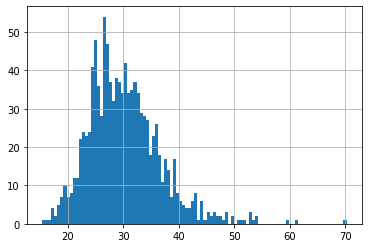

In [42]:
Lab_data_BMI_non_afib['BMI_VALUE'].hist(bins=100)

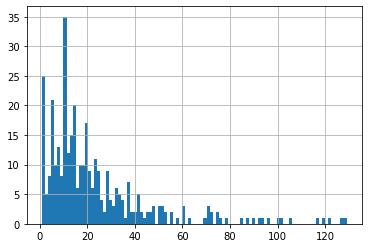

In [43]:
Lab_data_ESR_non_afib['ESR_VALUE'].hist(bins=100)

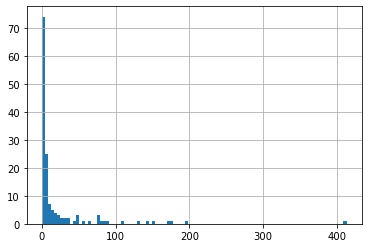

In [44]:
Lab_data_CRP_non_afib['CRP_VALUE'].hist(bins=100)

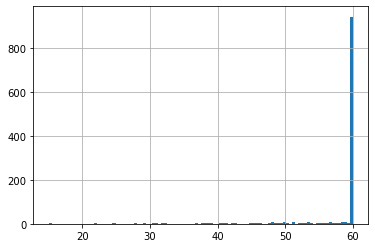

In [45]:
Lab_data_GFR_non_afib['GFR_VALUE'].hist(bins=100)

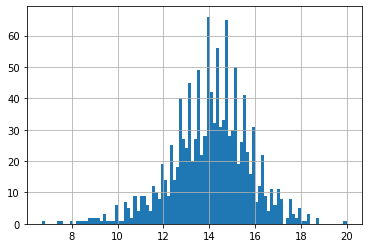

In [46]:
Lab_data_HB_non_afib['HB_VALUE'].hist(bins=100)

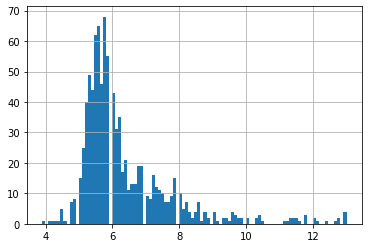

In [47]:
Lab_data_HBA1C_non_afib['HBA1C_VALUE'].hist(bins=100)

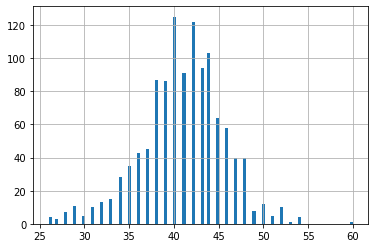

In [48]:
Lab_data_HCT_non_afib['HCT_VALUE'].hist(bins=100)

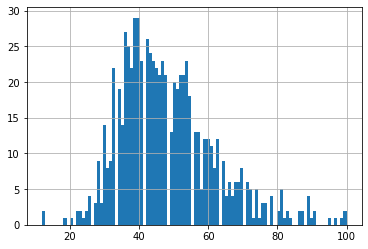

In [49]:
Lab_data_HDL_non_afib['HDL_VALUE'].hist(bins=100)

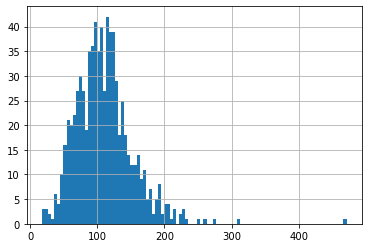

In [50]:
Lab_data_LDL_non_afib['LDL_VALUE'].hist(bins=100)

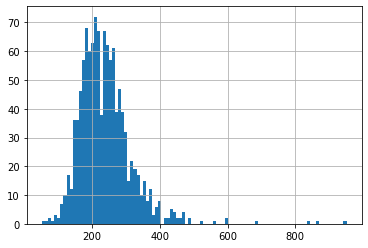

In [51]:
Lab_data_PLT_non_afib['PLT_VALUE'].hist(bins=100)

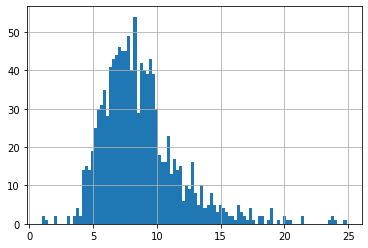

In [52]:
Lab_data_WBC_non_afib['WBC_VALUE'].hist(bins=100)

In [53]:
test = Lab_data_BMI_refined[Lab_data_BMI_refined['PT_ID'].isin(data_full_non_afib_patients_no_afib_5_years_follow_up['PT_ID'])].copy()
print(test.count())
testp= test.groupby('PT_ID',as_index=False)['TIME_DIFF_BMI_INDEX'].apply(lambda x: x.sort_values())
test['TIME_DIFF_BMI_INDEX'] = testp.reset_index(level=0, drop=True)
test['diff'] = test.groupby('PT_ID')['TIME_DIFF_BMI_INDEX'].diff()
test['diff'] = test['diff'].fillna(0)
test['cumsum'] = test.groupby('PT_ID')['diff'].cumsum()
#test['diff'] = test['diff'].fillna(0)
print(test.count())

PT_ID                  11042
BMI_DT                 11042
BMI_VALUE              11042
TIME_DIFF_BMI_INDEX    11042
dtype: int64
PT_ID                  11042
BMI_DT                 11042
BMI_VALUE              11042
TIME_DIFF_BMI_INDEX    11042
diff                   11042
cumsum                 11042
dtype: int64


In [54]:
test

,PT_ID,BMI_DT,BMI_VALUE,TIME_DIFF_BMI_INDEX,diff,cumsum
499,PT1039739,2009-10-31,28.20,-1082.00,0.00,0.00
500,PT1039739,2010-01-29,28.20,-992.00,90.00,90.00
501,PT1039739,2010-06-13,28.20,-857.00,135.00,225.00
502,PT1039739,2011-03-24,29.30,-573.00,284.00,509.00
503,PT1039739,2011-04-21,28.60,-545.00,28.00,537.00
...,...,...,...,...,...,...
409481,PT99593,2011-05-27,28.90,-364.00,1.00,1.00
409482,PT99593,2011-06-23,27.10,-337.00,27.00,28.00
409483,PT99593,2012-05-25,27.40,0.00,337.00,365.00
410272,PT99827,2007-03-01,41.70,-739.00,0.00,0.00
